## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
#mouse_metadata

In [3]:
#mouse_metadata.count()

In [4]:
#study_results

In [5]:
#study_results.count()

In [6]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Clean up column headings to be uniform.  Found this script on Stack OverFlow and thought it was helpful.
# Strips spaces,parentheses,and changes all text to lowercase and spaces to underscore
combined_data_df.columns = combined_data_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

#combined_data_df

## Summary statistics

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
for each regimen

In [7]:
# Create reduced DataFrame with only 'drug_regimen' and 'tumor_volume_mm3' fields
stats_df = combined_data_df[["drug_regimen", "tumor_volume_mm3"]]

# Re-name tumor_vol_mm3 to tumor_vol_mean which will be used later as column heading in groupby object
tumor_stats = stats_df.rename(columns={"tumor_volume_mm3":"tumor_vol_mean"})

# Copy 'tumor_vol_mean' 4x and append to tumor_stats DataFrame.  Named columns will hold our statistical results
tumor_stats["tumor_vol_median"] = tumor_stats.iloc[:,1]
tumor_stats["tumor_vol_variance"] = tumor_stats.iloc[:,1]
tumor_stats["tumor_vol_stdev"] = tumor_stats.iloc[:,1]
tumor_stats["tumor_vol_sem"] = tumor_stats.iloc[:,1]


grouped_drugregimen = tumor_stats.groupby('drug_regimen').agg({"tumor_vol_mean":"mean",
                                                               "tumor_vol_median":"median",
                                                               "tumor_vol_variance":"var",
                                                               "tumor_vol_stdev":"std"})
grouped_drugregimen

,tumor_vol_mean,tumor_vol_median,tumor_vol_variance,tumor_vol_stdev
drug_regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar plots

Generate a bar plot showing number of data points for each treatment regimen using pandas

Generate a bar plot showing number of data points for each treatment regimen using pyplot

In [8]:
grouped_drugregimen2 = combined_data_df.groupby('drug_regimen')

data_points = grouped_drugregimen2['drug_regimen'].count()
y_axis = data_points.tolist()
y_axis

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

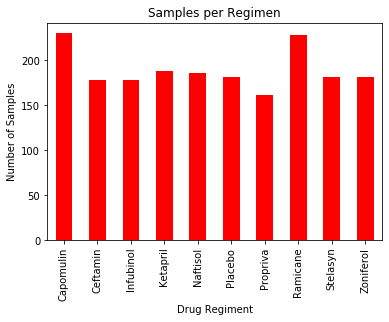

<Figure size 432x288 with 0 Axes>

In [19]:
# Create bar chart using Pandas .plot()
data_points.plot(kind="bar", figsize=(6,4),facecolor="red")

# Set textual properties
plt.title("Samples per Regimen")
plt.ylabel("Number of Samples")
plt.xlabel("Drug Regiment")

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()

([<matplotlib.axis.XTick at 0x20662bc76c8>,
 <a list of 10 Text xticklabel objects>)

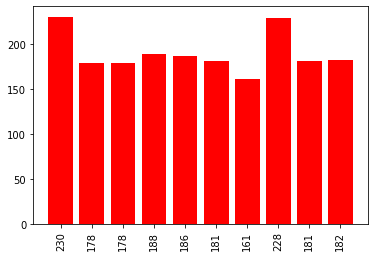

In [22]:
import numpy as np
data_points = grouped_drugregimen2["drug_regimen"].count()

x_axis = np.arange(len(data_points))
#x_axis = np.arange(data_points)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

#y_axis = 

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, y_axis, color='r',  align="center")
plt.xticks(tick_locations, y_axis, rotation="vertical")

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
#for the Capomulin regimen